# **1.   Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ecom_transactions = pd.read_excel('/content/drive/MyDrive/DA/DA/3. Python/Ecommerce retail.xlsx',sheet_name="ecommerce retail")
ecom_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **2.   Exploratory Data Analysis**

**Check Datatype:**

CustomerID type is float64 => Change to String

**Check Duplicate value:**
There is duplicate value for Invoice No. However, Invoice No can have duplicate value as on invoice can include multiple SKUs

**Check Null value:**
- CustomerID: There is 135080 null value =>
  Action:
  *   Delete rows with CustomerID is null
  *   Fill customerID by customerID have the same invoice no


**Check Abnormal value:**
- Invoice No start with C means Cancellation transactions => Action: Drop rows with InvoiceNo start with C


### **2.1.   Check dataset general information**

In [ ]:
ecom_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
ecom_transactions.shape

(541909, 8)

In [ ]:
ecom_transactions.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
ecom_transactions.describe(include= 'object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [ ]:
ecom_transactions.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
ecom_transactions.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
t=ecom_transactions[ecom_transactions["InvoiceNo"].astype(str).str.startswith("C", na=False)]
t

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Check quantity < 0
filtered_df = ecom_transactions[
    (ecom_transactions["Quantity"] < 0) &
    (~ecom_transactions["InvoiceNo"].str.startswith("C", na=False)) &
    (~ecom_transactions["CustomerID"].isin(["nan"]))
]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


### **2.2.   Clean Data**

In [ ]:
# @title Change customer ID to String {"form-width":"10%"}
ecom_transactions["CustomerID"]=ecom_transactions["CustomerID"].astype(str).str.slice(stop=-2)
ecom_transactions

NameError: name 'ecom_transactions' is not defined

In [ ]:
# @title Change InvoiceDate to datetime
ecom_transactions["InvoiceDate"]=pd.to_datetime(ecom_transactions["InvoiceDate"])
ecom_transactions['InvoiceDate']=ecom_transactions['InvoiceDate'].dt.strftime('%Y-%m-%d')
ecom_transactions['InvoiceDate']

,InvoiceDate
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01
...,...
541904,2011-12-09
541905,2011-12-09
541906,2011-12-09
541907,2011-12-09


In [ ]:
# @title Drop Null Customer ID
ecom_transactions = ecom_transactions[~ecom_transactions['CustomerID'].isin(["n"])]

In [ ]:
# @title Drop column where InvoiceNo start with C as it is Cancel transaction
ecom_transactions = ecom_transactions[~ecom_transactions["InvoiceNo"].astype(str).str.startswith("C", na=False)]
ecom_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


#**3. RFM Metrics & Scores Calculation**

###**3.1. Creating Recency, Frequency and Monetary**

In [ ]:
#Create Recency series
ecom_transactions["InvoiceDate"] = pd.to_datetime(ecom_transactions["InvoiceDate"])
Maxdate = ecom_transactions.groupby('CustomerID')['InvoiceDate'].max()
comparison_date = pd.Timestamp("2011-12-09")
Recency= comparison_date - Maxdate
Recency

,InvoiceDate
CustomerID,
12346,325 days
12347,2 days
12348,75 days
12349,18 days
12350,310 days
...,...
18280,277 days
18281,180 days
18282,7 days


In [ ]:
#Create Frequency series
Frequency = ecom_transactions.groupby('CustomerID')['InvoiceNo'].nunique()
Frequency

,InvoiceNo
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,2


In [ ]:
#Create Monetary series
ecom_transactions['TotalPrice'] = ecom_transactions['Quantity']*ecom_transactions['UnitPrice']
Monetary = ecom_transactions.groupby('CustomerID')['TotalPrice'].sum()
Monetary

,TotalPrice
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [ ]:
#RFM Dataset
RFM_Dataset = pd.concat([Recency, Frequency, Monetary], axis=1)
RFM_Dataset.columns = ['Recency', 'Frequency', 'Monetary']
RFM_Dataset

,Recency,Frequency,Monetary
CustomerID,,,
12346,325 days,1,77183.60
12347,2 days,7,4310.00
12348,75 days,4,1797.24
12349,18 days,1,1757.55
12350,310 days,1,334.40
...,...,...,...
18280,277 days,1,180.60
18281,180 days,1,80.82
18282,7 days,2,178.05


In [ ]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
RFM_Dataset['Recency_score'] = pd.qcut(RFM_Dataset['Recency'],5,labels=[5,4,3,2,1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
RFM_Dataset['Frequency_score'] = pd.qcut(RFM_Dataset['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
RFM_Dataset['Monetary_score'] = pd.qcut(RFM_Dataset['Monetary'],5,labels=[1,2,3,4,5])
RFM_Dataset

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
CustomerID,,,,,,
12346,325 days,1,77183.60,1,1,5
12347,2 days,7,4310.00,5,5,5
12348,75 days,4,1797.24,2,4,4
12349,18 days,1,1757.55,4,1,4
12350,310 days,1,334.40,1,1,2
...,...,...,...,...,...,...
18280,277 days,1,180.60,1,2,1
18281,180 days,1,80.82,1,2,1
18282,7 days,2,178.05,5,3,1


In [ ]:
#RFM Scoring
RFM_Dataset['RFM'] = RFM_Dataset['Recency_score'].astype(str) + RFM_Dataset['Frequency_score'].astype(str) + RFM_Dataset['Monetary_score'].astype(str)
RFM_Dataset = RFM_Dataset.reset_index()
RFM_Dataset

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM
0,12346,325 days,1,77183.60,1,1,5,115
1,12347,2 days,7,4310.00,5,5,5,555
2,12348,75 days,4,1797.24,2,4,4,244
3,12349,18 days,1,1757.55,4,1,4,414
4,12350,310 days,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,277 days,1,180.60,1,2,1,121
4335,18281,180 days,1,80.82,1,2,1,121
4336,18282,7 days,2,178.05,5,3,1,531
4337,18283,3 days,16,2094.88,5,5,5,555


###**3.2. Customer Segmentation based on RFM model**

In [ ]:
def Cus_segmentation(R, F, M):
    # Champion
    if 4 <= R <= 5 and F == 5 and M == 5:
        return "Champion"
    # Loyal Customer
    elif 3 <= R <= 5 and F == 5 and 3 <= M <= 5:
        return "Loyal Customer"
    # Promising
    elif 3 <= R <= 5 and 3 <= F <= 4 and 3 <= M <= 4:
        return "Promising"
    # Big Spenders
    elif 3 <= R <= 5 and F <= 2 and 3 <= M <= 4:
        return "Big Spenders"
    elif 3 <= R <= 5 and F <= 4 and M == 5:
        return "Big Spenders"
    # New customer
    elif 4 <= R <= 5 and F <= 2 and M <= 2:
        return "New Customer"
    # Need Attention
    elif 4 <= R <= 5 and 3 <= F <= 5 and  M <= 2:
        return "Need Attention"
    elif R == 3 and  M <= 2:
        return "Need Attention"
    # Lost
    elif 1 <= R <= 2 and F <= 2 and 1 <= M <= 2:
        return "Lost"
    # Sleepers
    else:
        return "Sleepers"
RFM_Dataset["Customer Segmentation"]=RFM_Dataset.apply(lambda x: Cus_segmentation(x['Recency_score'], x['Frequency_score'],x['Monetary_score']), axis=1)
RFM_Dataset

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM,Customer Segmentation
0,12346,325 days,1,77183.60,1,1,5,115,Sleepers
1,12347,2 days,7,4310.00,5,5,5,555,Champion
2,12348,75 days,4,1797.24,2,4,4,244,Sleepers
3,12349,18 days,1,1757.55,4,1,4,414,Big Spenders
4,12350,310 days,1,334.40,1,1,2,112,Lost
...,...,...,...,...,...,...,...,...,...
4334,18280,277 days,1,180.60,1,2,1,121,Lost
4335,18281,180 days,1,80.82,1,2,1,121,Lost
4336,18282,7 days,2,178.05,5,3,1,531,Need Attention
4337,18283,3 days,16,2094.88,5,5,5,555,Champion


In [ ]:
RFM_Dataset.groupby("Customer Segmentation")["Customer Segmentation"].count()

,Customer Segmentation
Customer Segmentation,
Big Spenders,332
Champion,523
Lost,827
Loyal Customer,279
Need Attention,483
New Customer,231
Promising,764
Sleepers,900


#**4. Visualizing data**

In [ ]:
RFM_visualization=RFM_Dataset.merge(ecom_transactions,how='left')
RFM_visualization["OrderValue"]=RFM_visualization["Quantity"]*RFM_visualization["UnitPrice"]
ShoppingDate1 = pd.Timestamp("2010-12-31")
ShoppingDate2 = pd.Timestamp("2011-10-01")
RFM_visualization_end_year=RFM_visualization[(RFM_visualization["InvoiceDate"]>=ShoppingDate2)|(RFM_visualization["InvoiceDate"]<=ShoppingDate1)]

###**4.1. Compare different quantity of customers in different segmentation**

<ipython-input-24-4110966811>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Count_Customer,


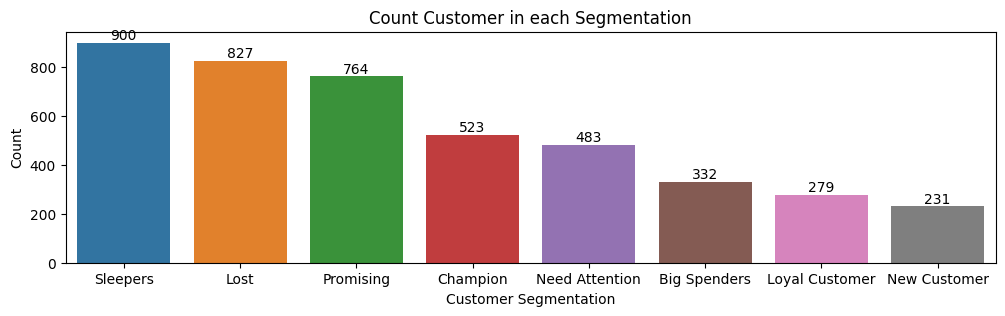

In [ ]:
Count_Customer = RFM_Dataset["Customer Segmentation"].value_counts().reset_index()
plt.figure(figsize=(12, 3))
sns.barplot(data=Count_Customer,
    x="Customer Segmentation",
    y="count",
    palette="tab10"
)
for i, value in enumerate(Count_Customer["count"]):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Count Customer in each Segmentation")
plt.xlabel("Customer Segmentation")
plt.ylabel("Count")
plt.show()

###**4.2. Compare revenue in different segmentation**

<ipython-input-25-683968652>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Revenue_compare,


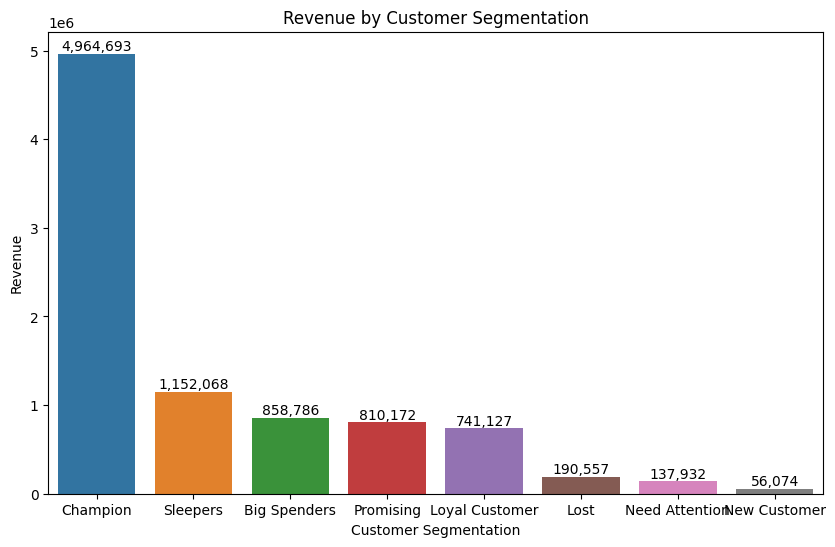

In [ ]:
# @title Revenue from 2010 to 2011
Revenue_compare=RFM_Dataset.groupby("Customer Segmentation")["Monetary"].sum().sort_values(ascending=False)
Revenue_compare=Revenue_compare.to_frame()
plt.figure(figsize=(10, 6))
sns.barplot(data=Revenue_compare,
    x="Customer Segmentation",
    y="Monetary",
    palette="tab10"
)
for i, value in enumerate(Revenue_compare["Monetary"]):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Revenue by Customer Segmentation")
plt.xlabel("Customer Segmentation")
plt.ylabel("Revenue")
plt.show()

<ipython-input-26-46631168>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Revenue_compare1,


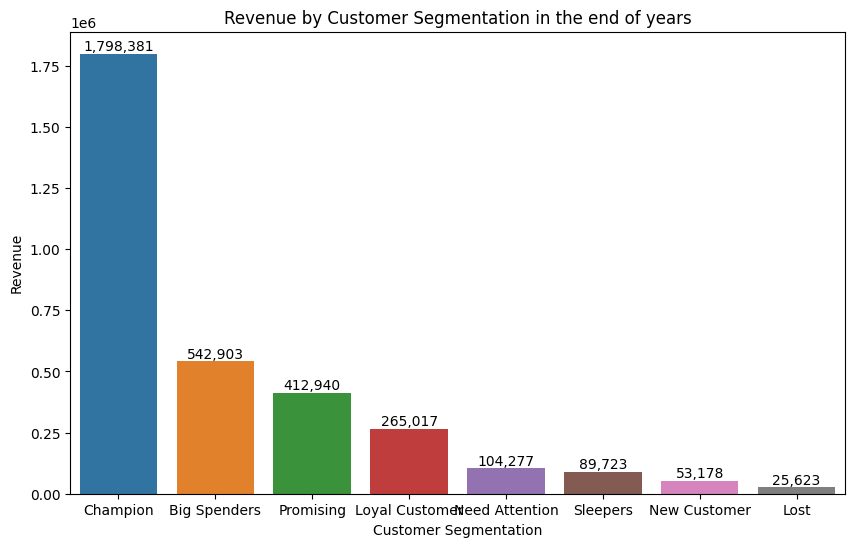

In [ ]:
# @title Revenue at the end of 2010 and 2011
Revenue_compare1=RFM_visualization_end_year.groupby("Customer Segmentation")["OrderValue"].sum().sort_values(ascending=False)
Revenue_compare1=Revenue_compare1.to_frame()
plt.figure(figsize=(10, 6))
sns.barplot(data=Revenue_compare1,
    x="Customer Segmentation",
    y="OrderValue",
    palette="tab10"
)
for i, value in enumerate(Revenue_compare1["OrderValue"]):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Revenue by Customer Segmentation in the end of years")
plt.xlabel("Customer Segmentation")
plt.ylabel("Revenue")
plt.show()

###**4.3. Compare quantity of customer in different segmentation and countries**

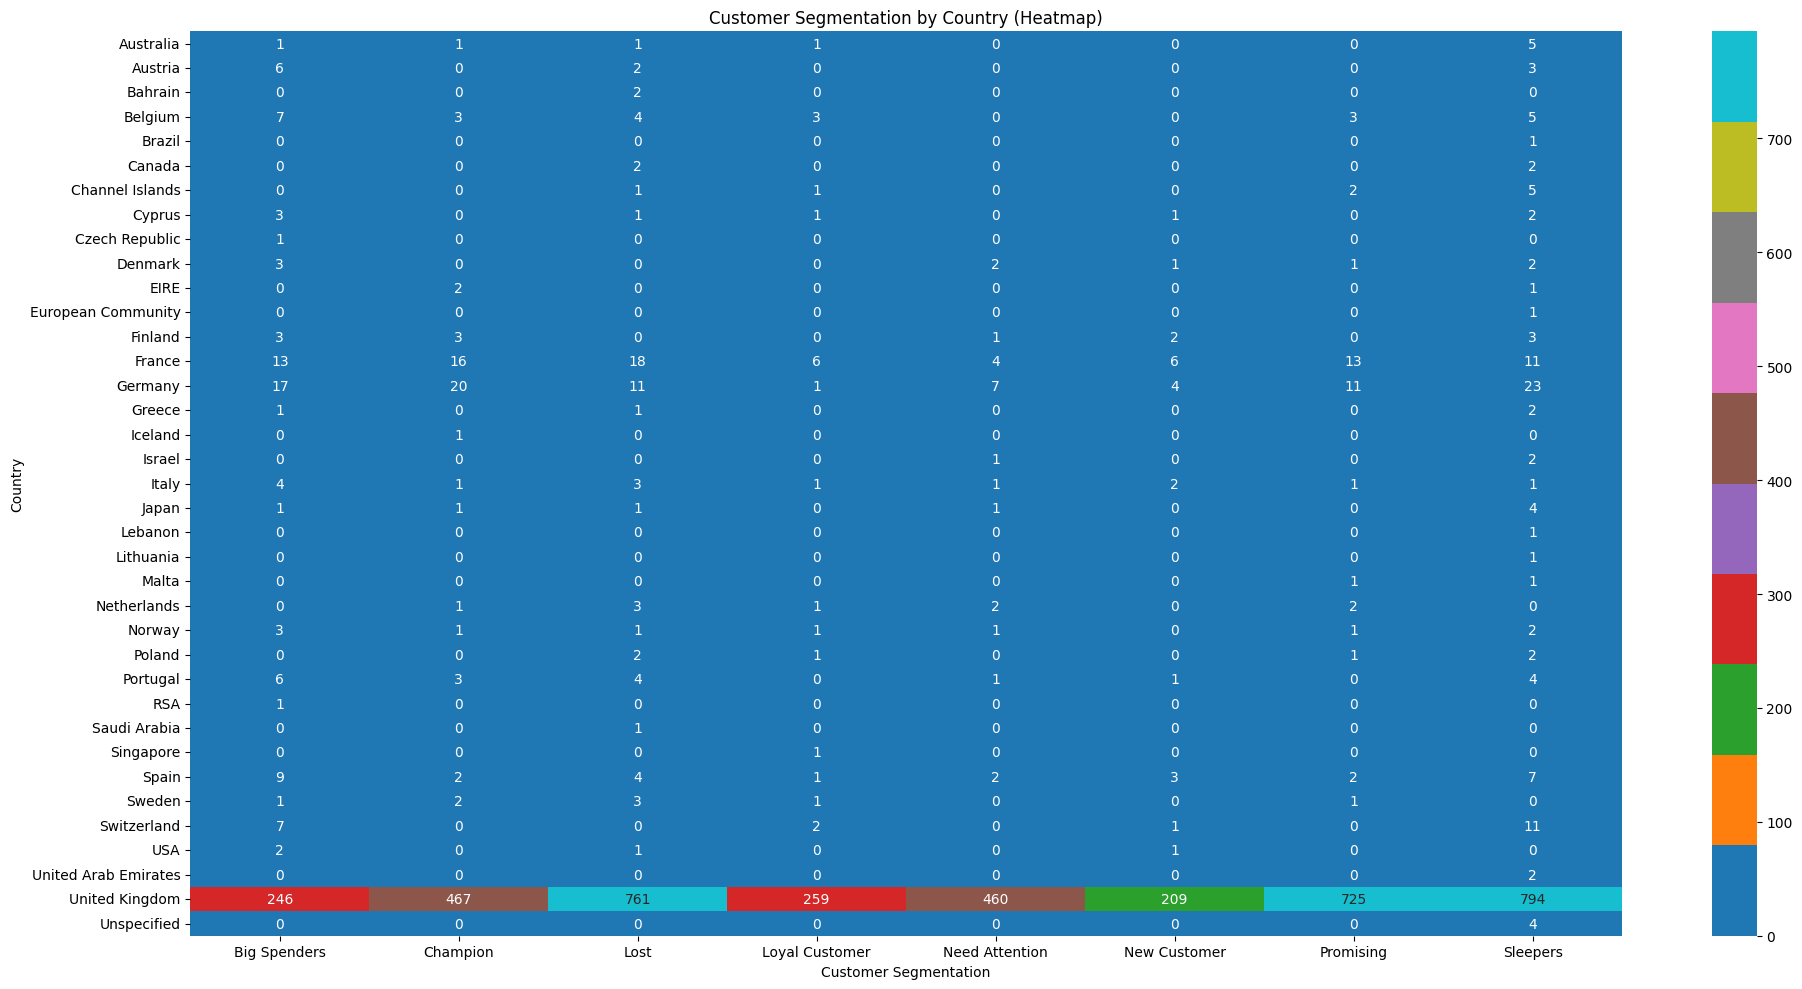

In [ ]:
heatmap_country_data = RFM_visualization.pivot_table(
    index='Country',
    columns='Customer Segmentation',  # or 'Customer Segmentation'
    values='CustomerID',
    aggfunc=pd.Series.nunique,
    fill_value=0)
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_country_data, annot=True, fmt="d", cmap="tab10")
plt.title('Customer Segmentation by Country (Heatmap)')
plt.xlabel('Customer Segmentation')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

###**4.4. Compare revenue in date of the end of 2010 and 2011**

In [ ]:
Revenue_by_Date = RFM_visualization_end_year.pivot_table(
    index="InvoiceDate",
    columns="Customer Segmentation",
    values="OrderValue",
    aggfunc="sum",
    fill_value=0
)

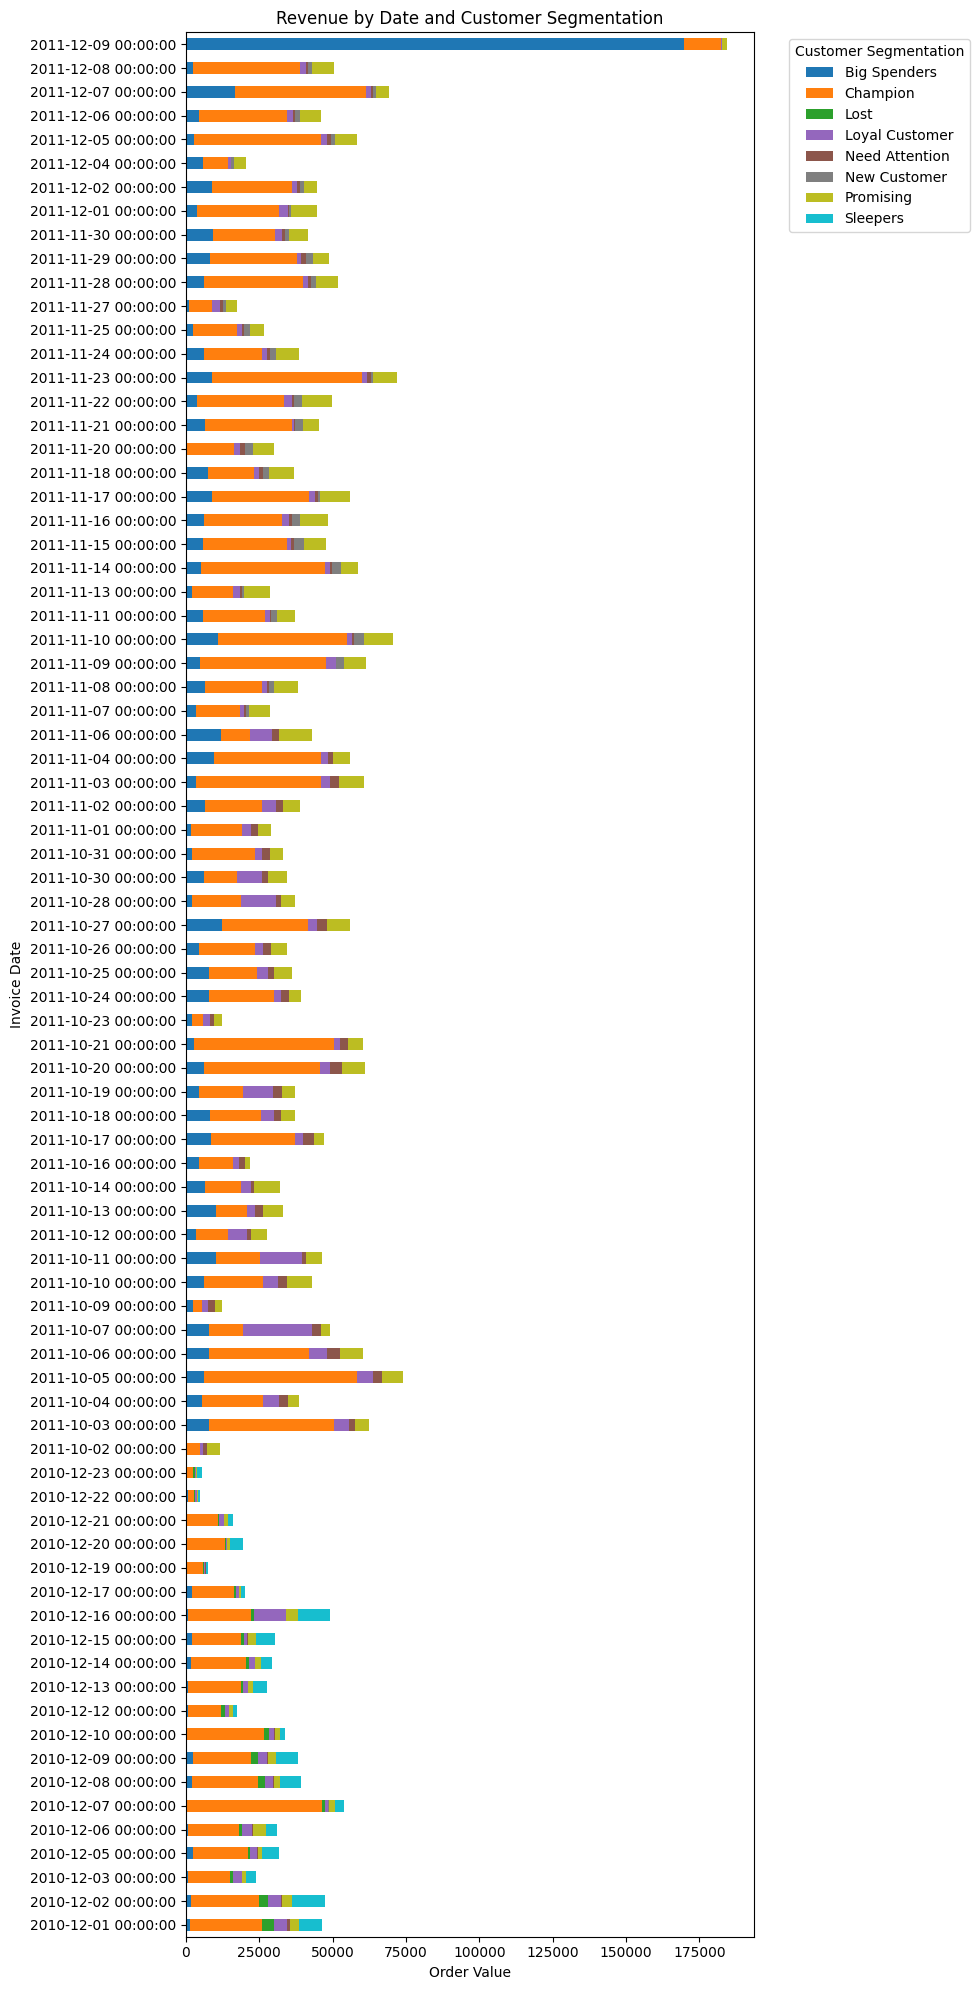

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
Revenue_by_Date.plot(kind="barh", stacked=True, ax=ax, colormap="tab10")
plt.title("Revenue by Date and Customer Segmentation")
plt.xlabel("Order Value")
plt.ylabel("Invoice Date")
plt.legend(title="Customer Segmentation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###**4.5. Top 3 products with highest revenue in each segmentation**

In [ ]:
# @title In the end of 2010 and 2011
Top_3_Products_by_segmentation_end_year=RFM_visualization_end_year.groupby(["StockCode","Description","Customer Segmentation"])["OrderValue"].sum().reset_index()
Top_3_Products_by_segmentation_end_year=Top_3_Products_by_segmentation_end_year.sort_values(by=["Customer Segmentation","OrderValue"],ascending=[True,False])
Top_3_Products_by_segmentation_end_year = (
    Top_3_Products_by_segmentation_end_year
    .groupby("Customer Segmentation")
    .head(3)
    .reset_index(drop=True)
)
Top_3_Products_by_segmentation_end_year

,StockCode,Description,Customer Segmentation,OrderValue
0,23843,"PAPER CRAFT , LITTLE BIRDIE",Big Spenders,168469.60
1,M,Manual,Big Spenders,9386.45
2,POST,POSTAGE,Big Spenders,8242.00
3,22423,REGENCY CAKESTAND 3 TIER,Champion,33513.87
4,23084,RABBIT NIGHT LIGHT,Champion,26708.21
5,22086,PAPER CHAIN KIT 50'S CHRISTMAS,Champion,21611.17
6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,Lost,323.50
7,POST,POSTAGE,Lost,314.00
8,17096,ASSORTED LAQUERED INCENSE HOLDERS,Lost,293.76
9,M,Manual,Loyal Customer,6148.75


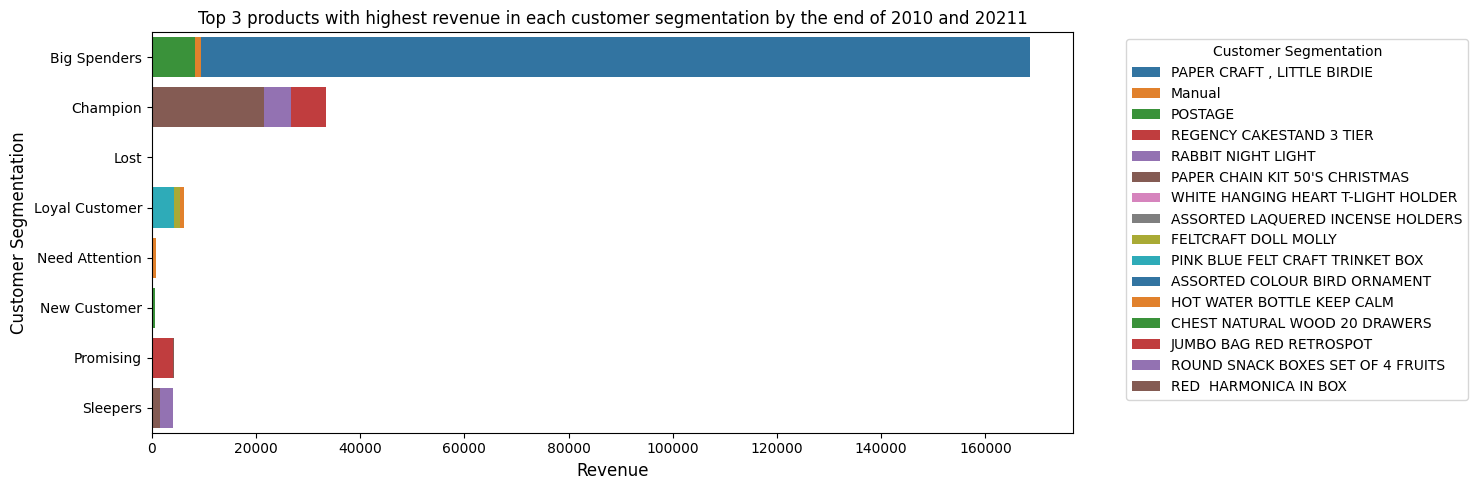

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(
    data=Top_3_Products_by_segmentation_end_year,
    x="OrderValue",
    y="Customer Segmentation",
    hue="Description",
    dodge=False,
    palette="tab10"
)
plt.title("Top 3 products with highest revenue in each customer segmentation by the end of 2010 and 20211")
plt.xlabel("Revenue",fontsize=12)
plt.ylabel("Customer Segmentation",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Customer Segmentation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

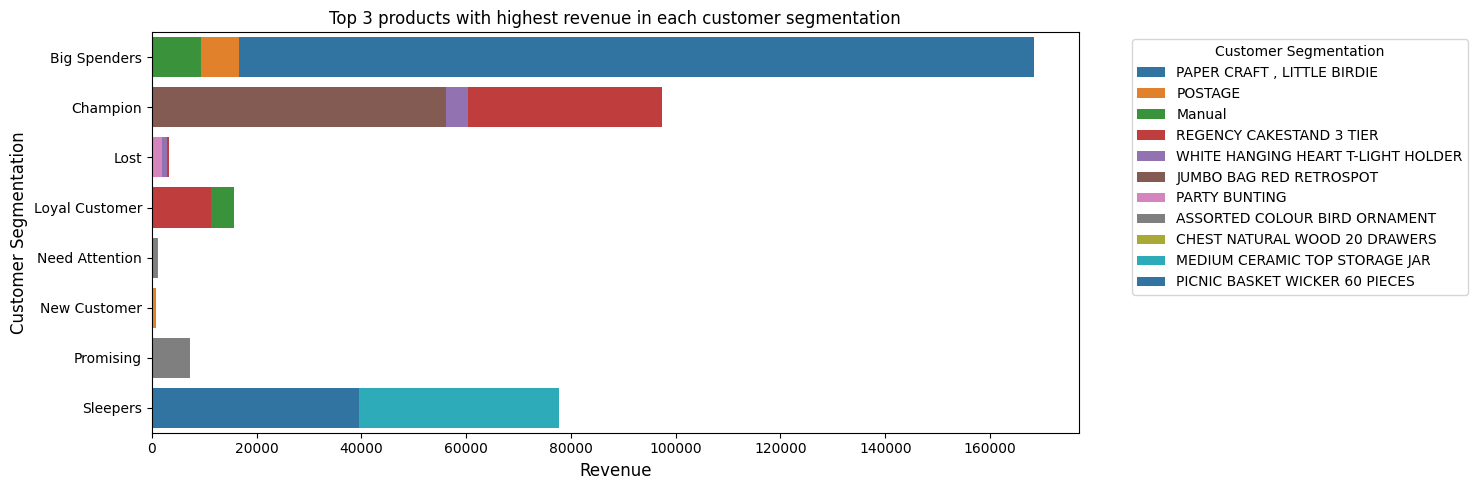

In [ ]:
# @title From 2010 to 2011
Top_3_Products_by_segmentation=RFM_visualization.groupby(["StockCode","Description","Customer Segmentation"])["OrderValue"].sum().reset_index()
Top_3_Products_by_segmentation=Top_3_Products_by_segmentation.sort_values(by=["Customer Segmentation","OrderValue"],ascending=[True,False])
Top_3_Products_by_segmentation = (
    Top_3_Products_by_segmentation
    .groupby("Customer Segmentation")
    .head(3)
    .reset_index(drop=True)
)
plt.figure(figsize=(15, 5))
sns.barplot(
    data=Top_3_Products_by_segmentation,
    x="OrderValue",
    y="Customer Segmentation",
    hue="Description",
    dodge=False,
    palette="tab10"
)
plt.title("Top 3 products with highest revenue in each customer segmentation")
plt.xlabel("Revenue",fontsize=12)
plt.ylabel("Customer Segmentation",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Customer Segmentation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###**4.6. Average value per order**

<ipython-input-33-3246343892>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


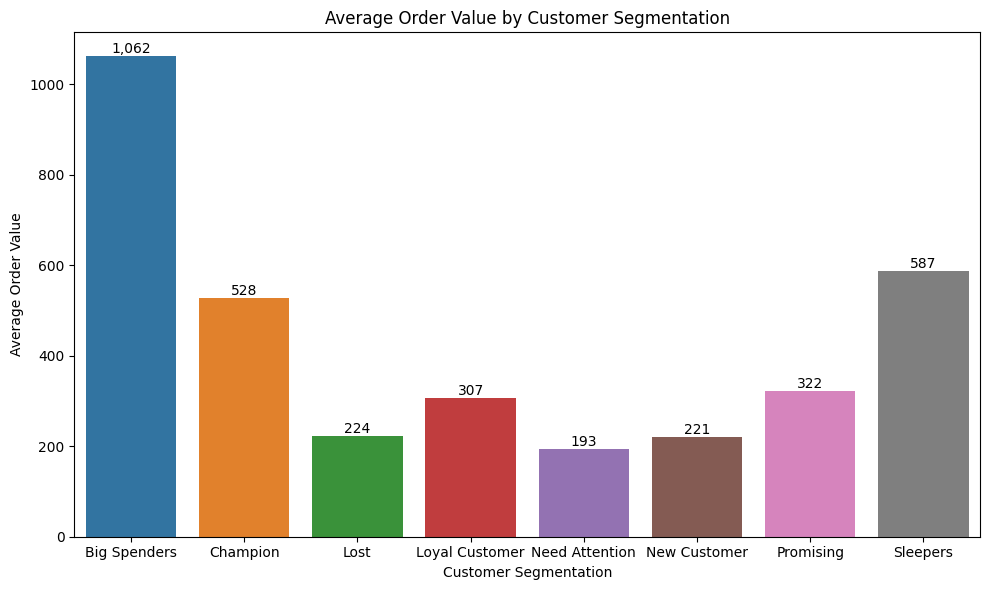

In [ ]:
RFM_Dataset["Average Order Value"] = RFM_Dataset["Monetary"] / RFM_Dataset["Frequency"]

avg_order_value = RFM_Dataset.groupby("Customer Segmentation")["Average Order Value"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_order_value,
    x="Customer Segmentation",
    y="Average Order Value",
    palette="tab10"
)
for i, value in enumerate(avg_order_value["Average Order Value"]):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Order Value by Customer Segmentation")
plt.ylabel("Average Order Value")
plt.xlabel("Customer Segmentation")
plt.tight_layout()
plt.show()

<ipython-input-34-1837693691>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


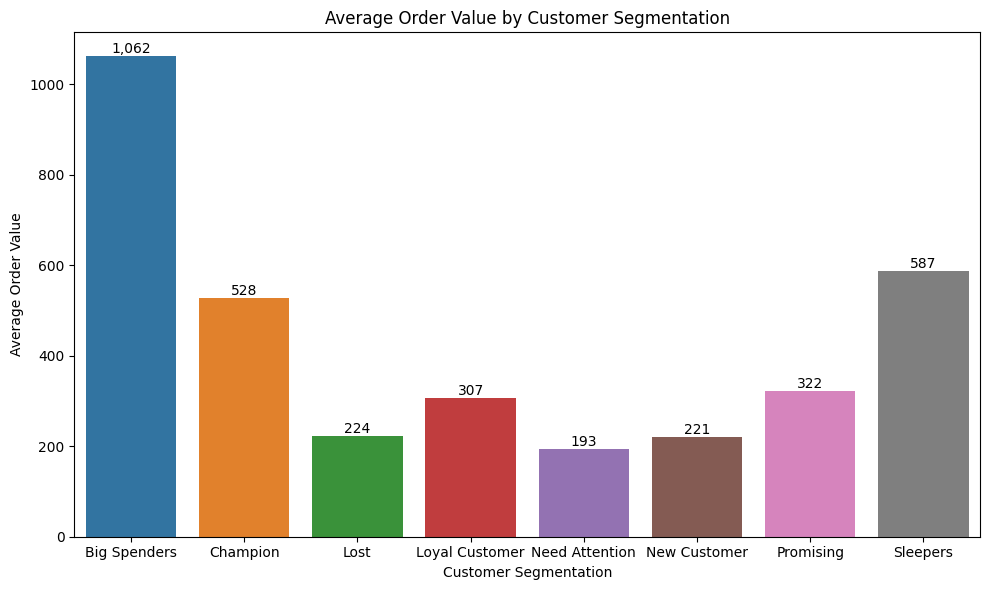

In [ ]:
RFM_Dataset["Average Order Value"] = RFM_Dataset["Monetary"] / RFM_Dataset["Frequency"]
avg_order_value = RFM_Dataset.groupby("Customer Segmentation")["Average Order Value"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_order_value,
    x="Customer Segmentation",
    y="Average Order Value",
    palette="tab10"
)
for i, value in enumerate(avg_order_value["Average Order Value"]):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Average Order Value by Customer Segmentation")
plt.ylabel("Average Order Value")
plt.xlabel("Customer Segmentation")
plt.tight_layout()
plt.show()

#**5. Recommendation**

###**5.1. Insight:**
- *Insight 1* : In the end of 2010 and 2011, Top 3 most crowded customer groups include Sleepers, Lost, Promissing while  Top 3 customer groups with highest revenue include Champions, Big spenders, Promising => Champion & Big spender customers take up small number of customer but contribute the most to the revenue
  
- *Insight 2* : From 2010 to 2011, Top 3 most crowded customer groups include Sleepers, Lost, Promissing while  Top 3 customer groups with highest revenue include Champions, Big spenders, Sleepers => Champion & Big spender customers take up small number of customer but contribute the most to the revenue

- *Insight 3* : Over 90% of SuperStore's customers are from the UK, making it an undeniable strategic market

- *Insight 4* : Revenue surges from the beginning of October to mid-December, confirming this as the golden period for launching sales-driving campaigns.

- *Insight 5* : Top 3 products with having highest revenue in important customer segmentation
  
  + Champion customer: REGENCY CAKESTAND 3 TIER, RABBIT NIGHT LIGHT, and PAPER CHAIN KIT 50'S CHRISTMAS.
  
  + Big spender customer: PAPER CRAFT LITTLE BIRDIE, Manual and POSTAGE.
  
  + Promissing customer: JUMBO BAG RED RETROSPOT, RABBIT NIGHT LIGHT, and PAPER CHAIN KIT 50'S CHRISTMAS.

  + Sleepers: WHITE HANGING HEART T-LIGHT HOLDER, RED HARMONICA IN BOX, and ROUND SNACK BOXES SET OF 4 FRUITS

###**5.2. Target 1 - Recommendation for appreciation campaigns for top customers to boost company revenue:**

- General recommendation:

  + Superstore should focus on these 4 main customer segmentation as they account for considerable amount of revenue: Champion customers, Big spender customers,Promissing customers and Sleepers.
  + UK should be the main market to focus.

- Recomendation for each type of customer:

  + Champion customer: Create a top-tier in loyalty program exclusively for Champions: special and personalized chirstmast & new year gifts, Early Access to Christmast & New Year Limited Edition Collection, send a personalized handwritten card with their order => Increase retention, recognition, and maximizing lifetime value of chamion customers

  + Big spender customer: Offer an exclusive gift set or luxury bundle when they make another high-value purchase, time-limited voucher or free shipping on the next order => Increase frequency

  + Promissing customer: Give vouchers/discount/gifts/cashback if you purchase next time or if user buy order with high value. Offer cross-selling promotion related to top 3 most valuable product with promissing customer.

  + Sleepers: Offer discounts/gifts/vouchers campaign if customer be back through email & phone number => Increase recency

###**5.3. Target 2 -  campaigns to turn prospects into loyal custCreateomers**

- Voucher/Discount/Cashback when buy combo especially when customer buy top product including JUMBO BAG RED RETROSPOT, RABBIT NIGHT LIGHT, and PAPER CHAIN KIT 50'S CHRISTMAS

- Offer points, voucher, discount & coupon when buy the next time

- Launch loyalty program and offer special benefits if promissing customer become loyal customer